In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2024-04-02 / Aki Taanila


# Lineaarinen regressio - yksi selittävä muuttuja

Lineaarisessa regressiossa sovitetaan suora viiva kuvaamaan selittävän muuttujan ja ennustettavan muuttujan välistä yhteyttä. Yleensä käytetään suoran sovitukseen pienimmän neliösumman menetelmää, joka minimoi ennustevirheiden neliöiden summan.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Tuon lineaarisen regressiomallin
from sklearn.linear_model import LinearRegression

## Datan tarkastelua

Tavoitteena ennustaa myynti mainoskulujen perusteella.

In [3]:
df = pd.read_excel('http://taanila.fi/linreg1.xlsx')
df

,Kuukausi,Mainoskulut 1000 €,Myynti 1000 €
0,1,1.2,101
1,2,0.8,92
2,3,1.0,110
3,4,1.3,120
4,5,0.7,90
5,6,0.8,82
6,7,1.0,93
7,8,0.6,75
8,9,0.9,91
9,10,1.1,105


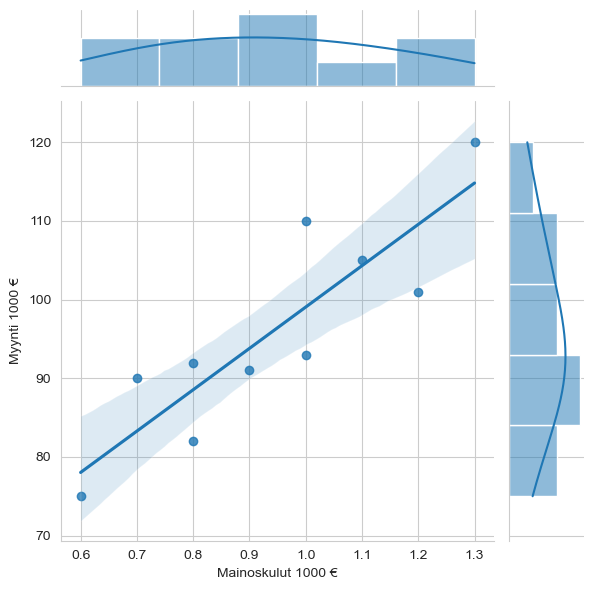

In [4]:
# Riippuvuuden tarkastelua seaborn-kirjaston jointoplot-kaavion avulla
sns.jointplot(data=df, x='Mainoskulut 1000 €', y='Myynti 1000 €', kind='reg')

## Mallin sovitus

In [5]:
# Selittävä muuttuja
# Jos selittäviä muuttujia on vain yksi, niin tarvitaan dataframeksi muuntaminen (to_frame)
X = df['Mainoskulut 1000 €'].to_frame()

# Ennustettava muuttuja
y = df['Myynti 1000 €'] 

In [6]:
malli = LinearRegression().fit(X,y)

## Mallin tarkastelua

In [7]:
malli.coef_ # regressiosuoran kulmakerroin

array([52.56756757])

Mallin mukaan yhden yksikön (1000 €) kasvu mainoskuluissa lisää myyntiä noin 52,6 yksiköllä (1000 €).

In [8]:
malli.intercept_ # regressiosuoran vakiotermi

46.486486486486505

Jos mainoskuluja ei ole lainkaan, niin mallin mukainen myynti on noin 46,5 yksikköä (1000 €). Tähän tietoon täytyy suhtautua varoen, koska havainnoissa ei ole mukana nollan lähellä olevia mainoskuluja. Näin ollen ei voida tietää päteekö suoraviivainen riippuvuus mainoskulujen 0 lähellä.

In [9]:
malli.score(X,y) # selityskerroin

0.7663982928521625

Myynnin vaihtelusta noin 76,6 % voidaan selittää mainoskulujen vaihtelulla.

## Mallin käyttö ennustamiseen

In [10]:
# Myyntiennusteet, jos mainoskulut tuhansina euroina ovat 0.7, 0.8 tai 0.9
df_new = pd.DataFrame([0.7, 0.8, 0.9], columns = ['Mainoskulut 1000 €']) 
df_new['Myyntiennuste 1000 €'] = malli.predict(df_new) 
df_new

,Mainoskulut 1000 €,Myyntiennuste 1000 €
0,0.7,83.283784
1,0.8,88.540541
2,0.9,93.797297


<h2>Lisätietoa</h2>

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/